NOTE: This notebook does not exist in a Jupyter environment where the SQL code can be ran, so images of the queries and their returned tables from the SQLite test environment are provided. Sorry about that!

In this project, we are acting as an analyst at a business who sells vehicles, and we are
performing analysis to help the business on multiple fronts, including sales, marketing,
communications, and operations.

To familiarize ourselves with the data, this first query is to get the number of columns
and rows of each table we are working with in our database.

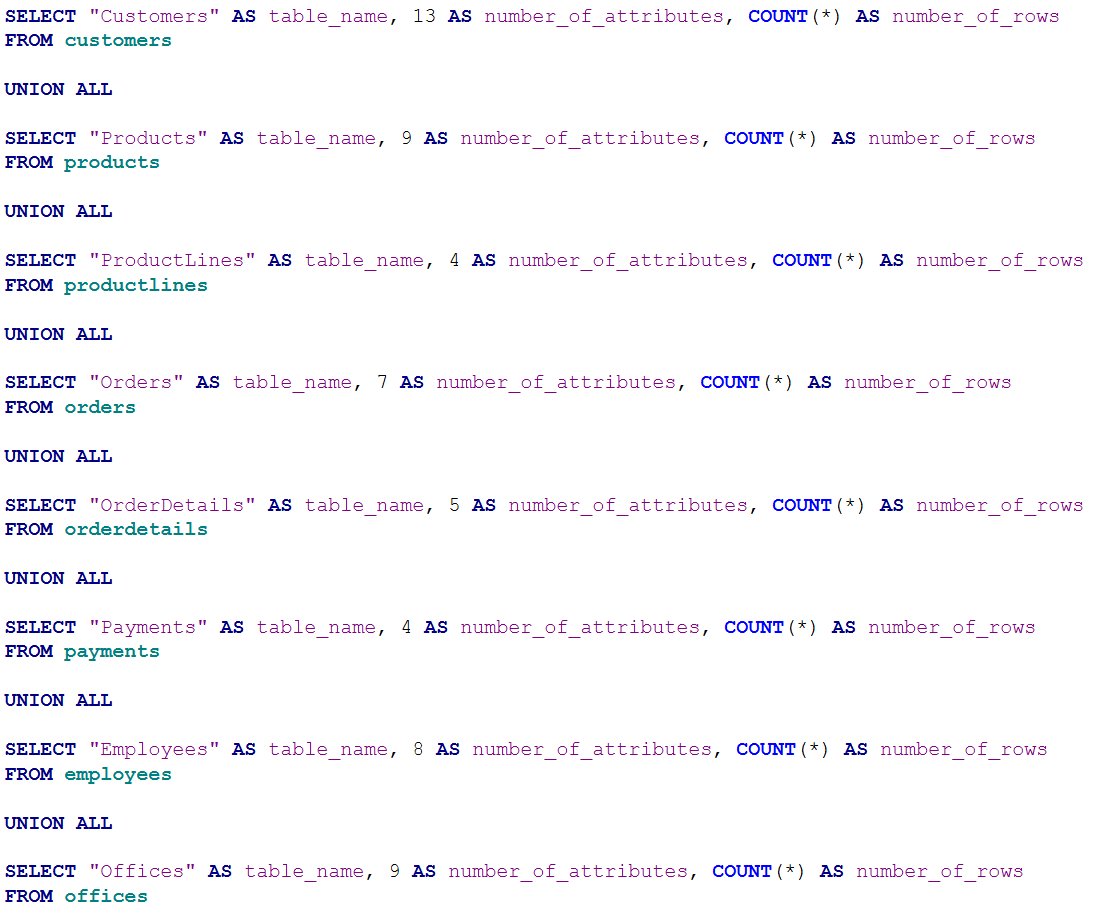

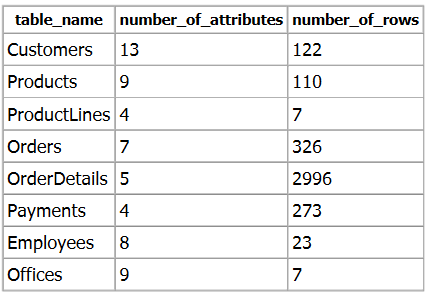

We are interested here in which are our best performing products, and more specifically
we want an answer to the question - "Which products should we order more or less of?"

To determine an answer to this, we want to determine a ranking of product performance
to guide us in the decision of which products we should emphasize or de-emphasize
based on their performance rating.

The first of the performance ratings we are going to choose here is what we will call 
"demand rating" which is the quantity ordered of a particular item divided by the amount
currently in stock. (SUM(ordered)/stockquantity)
We will perform this query on a seperate tab called "DemandRating".

The second one will be the gross sales per product, which is the total sum in dollars
of the sales revenue generated from each item. (SUM(ordered*listprice))

We are going to limit this query to only returning the top 10 highest demand products.

Below we will perform a query that will return a table containing products ranked by these
ratings established above.

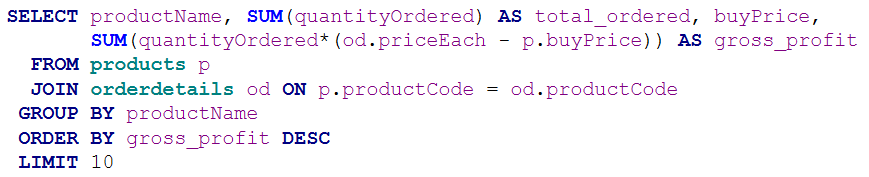

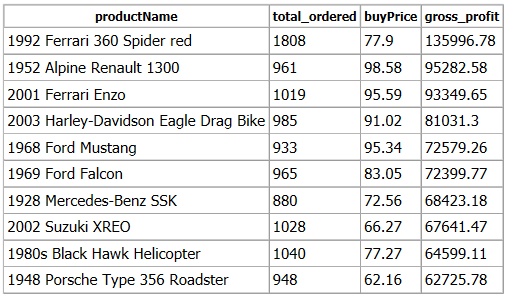

We can see above the list of products ranked by their gross profit.

This next query will display the "demand rating" metric calculation mentioned previously.

We are going to limit this query to only returning the top 10 highest demand products.

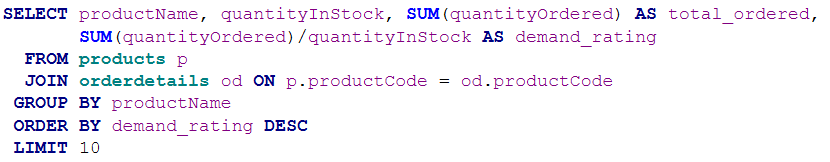

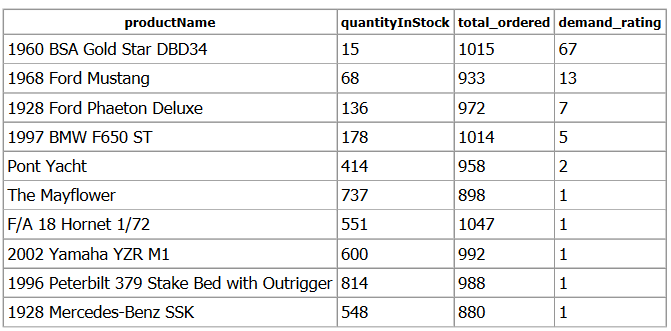

Now we can see what products we'd like to emphasize based on their performances, or stock more of.

In order to market most effectively, we'd like to know who our most profitable customers
are, AKA our VIP customers. Our marketing team would like to know who these customers are,
as they may want to plan special events or communications for them in order to continue
with their ongoing business with us, or possibly expand it.

We are going to query our data to find these customers by number, name, and the respective
gross sales and gross profits from our transactions with them.

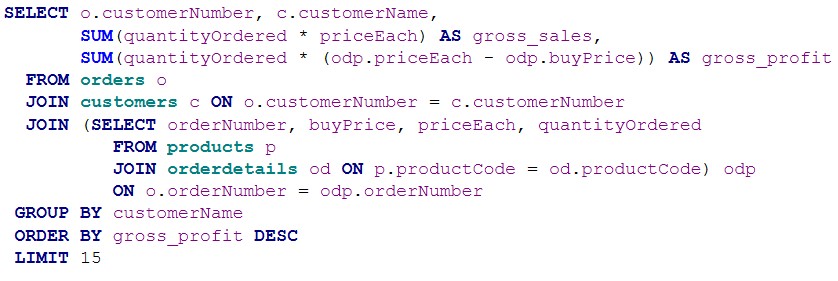

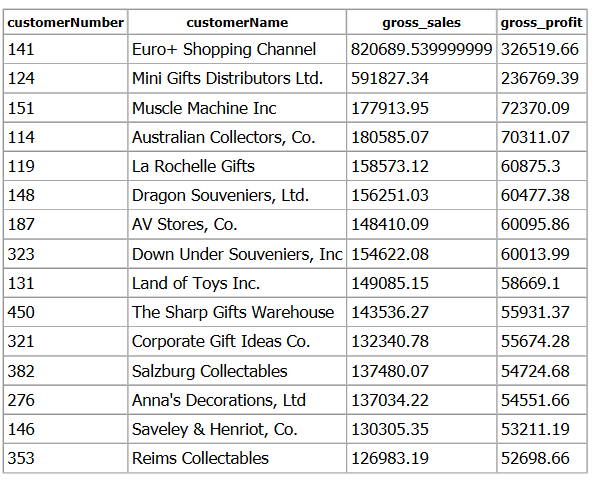

At a glance, our two easiest candidates for VIP are "Euro+ Shopping Channel" and
"Mini Gifts Distributors Ltd."

These two customers are seperated from the adjacent cluster by several standard 
deviations. The marketing team could add the next few customers if they are looking
for candidates to grow business with.

This next query comes from modifying our VIP query to see who our lowest grossing customers are, to see if we'd like to discontinue the relationship, or see if there is more ways we can do business
with one another.

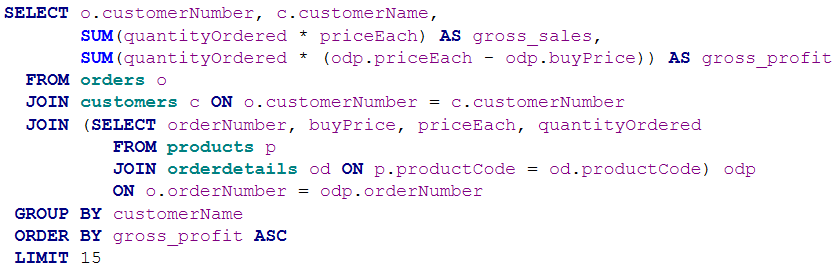

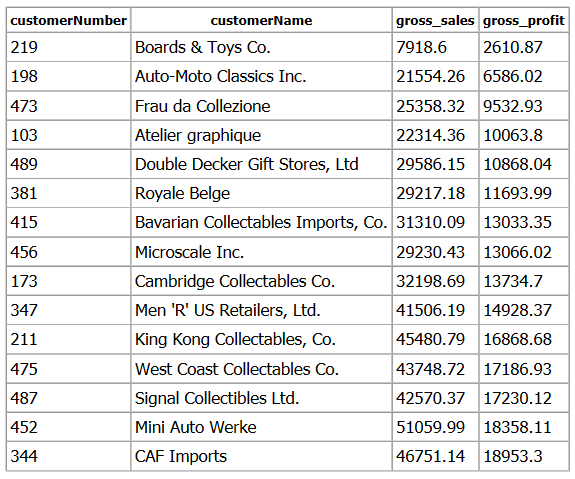

This concludes a demonstration of taking a look at our SQL database and performing some basic calculations to derive useful insights for our internal teams. Thank you for reading!